In [1]:
import numpy as np
import supervision as sv

def process_image_mass(file_path):
    image_mask_list = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()

            if not parts:
                continue

            parts_float = [float(coord) for coord in parts[1:]]
            num_vertices = len(parts_float) // 2
            assert len(parts_float) % 2 == 0, "The number of coordinates should be even."
            
            polygon = np.array(parts_float).reshape(num_vertices, 2)   
            #Convert from polygon to mask
            mask = sv.polygon_to_mask((polygon*640).astype(int), (640,640))
            #Count nonzero pixels
            image_mask_list.append(mask)
            
    return image_mask_list

In [2]:
# Import necessary libraries
import cv2
from matplotlib import pyplot as plt

def show_image(img, title="Image"):
    """ Utility function to display an image. """
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def preprocess_image(image_path):
    """ Function to preprocess the image. """
    # Read the image
    img = cv2.imread(image_path)
    show_image(img, "Original Image")
    
    # Manually crop the image (this step can be automated as needed)
    # For this example, we'll take a slice. Replace with actual coordinates after manual cropping.
    cropped_img = img[50:250, 50:250]  # Replace with actual coordinates
    show_image(cropped_img, "Cropped Image")

    # Brighten the image
    # Convert to HSV (hue, saturation, value) color space and increase the V channel
    hsv = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, 30)  # Add a value to the V channel to brighten the image
    final_hsv = cv2.merge((h, s, v))
    brightened_img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    show_image(brightened_img, "Brightened Image")

    # Resize the image to 4% of its original size
    height, width = brightened_img.shape[:2]
    resized_img = cv2.resize(brightened_img, (int(width * 0.04), int(height * 0.04)))
    show_image(resized_img, "Resized Image")

    return resized_img

def extract_features(image):
    """ Extract RGB features from the image. """
    # Split the image into R, G, and B components
    r, g, b = cv2.split(image)
    
    # Flatten each channel and stack them into a feature vector
    features = [r.flatten(), g.flatten(), b.flatten()]
    return features

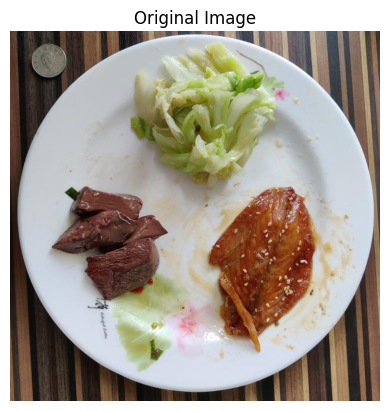

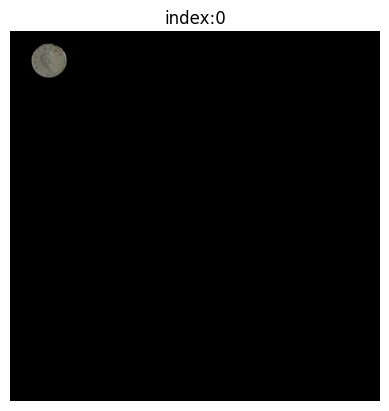

Total number of features: 1228800


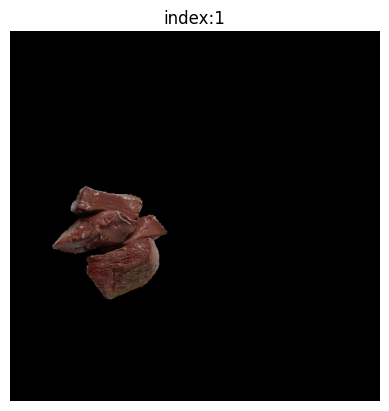

Total number of features: 1228800


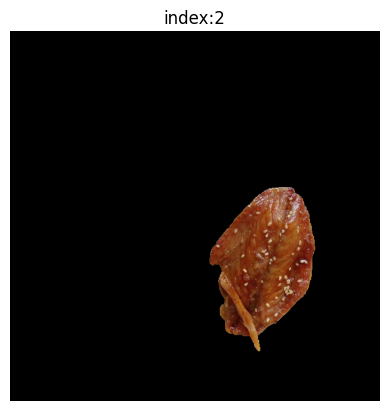

Total number of features: 1228800


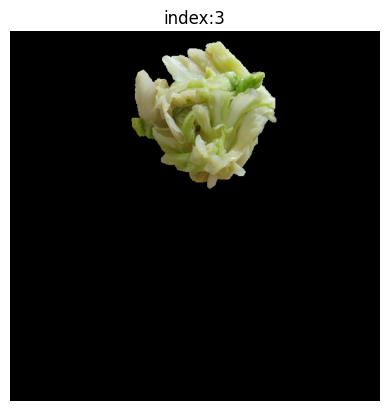

Total number of features: 1228800


In [3]:
# Path to your image
image_path = '../generate_csv/Food-18/train/images/IMG_20231201_131516_jpg.rf.59c1785d9e8f40e8d23cbf5c7b9f24ba.jpg'

# Preprocess the image
#preprocessed_img = preprocess_image(image_path)

img = cv2.imread(image_path)
show_image(img, "Original Image")

# Get mask of the image
image_mask = process_image_mass('../generate_csv/Food-18/train/labels/IMG_20231201_131516_jpg.rf.59c1785d9e8f40e8d23cbf5c7b9f24ba.txt')

for index in range(len(image_mask)):
  #print(image_mask[index])
  masked_image = cv2.bitwise_and(img, img, mask = image_mask[index].astype(np.uint8))
  show_image(masked_image, f"index:{index}")
  features = extract_features(masked_image)
  print(f"Total number of features: {len(features[0]) * 3}")  # Each channel contributes equally


# Extract features
#features = extract_features(preprocessed_img)

# Displaying the total number of features
#print(f"Total number of features: {len(features[0]) * 3}")  # Each channel contributes equally
